In [167]:
pip install pandas numpy matplotlib seaborn scipy scikit-learn plotly

   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
    --------------------------------------- 0.3/16.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.3 MB 1.3 MB/s eta 0:00:13
   - -------------------------------------- 0.8/16.3 MB 1.2 MB/s eta 0:00:13
   -- ------------------------------------- 1.0/16.3 MB 1.3 MB/s eta 0:00:12
   --- ------------------------------------ 1.3/16.3 MB 1.3 MB/s eta 0:00:12
   --- ------------------------------------ 1.6/16.3 MB 1.3 MB/s eta 0:00:12
   ---- ----------------------------------- 1.8/16.3 MB 1.4 MB/s eta 0:00:11
   ----- ---------------------------------- 2.1/16.3 MB 1.3 MB/s eta 0:00:11
   ----- ---------------------------------- 2.4/16.3 MB 1.3 MB/s eta 0:00:11
   ------ --------------------------------- 2.6/16.3 MB 1.3 MB/s eta 0:00:11
   ------- -------------------------------- 2.9/16.3 MB 1.3 MB/s eta 0:00:11
   ------- ---------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
# Pemeriksaan Awal Dataset

In [152]:
#Import Library Yang Dibutuhkan 
import pandas as pd 
import matplotlib.pyplot as plt  

#Import Data
df = pd.read_csv('StudentsPerformance.csv') 

#Lihat sample data dan Info data 
print('Sample 5 data teratas :\n',df.head())
print(20*'**')
print('Info data :\n',df.info())
print(20*'**','\n\n')


Sample 5 data teratas :
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 

In [137]:
# Pembersihan Data (Cleaning)

In [153]:
print('Cek Jumlah Missing Value pada setiap kolom :\n',df.isna().sum())
print(20*'**') 
# Lihat Jumlah Duplicated Data 
print('Jumlah Duplicated data :\n',df.duplicated().sum())

Cek Jumlah Missing Value pada setiap kolom :
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
****************************************
Jumlah Duplicated data :
 0


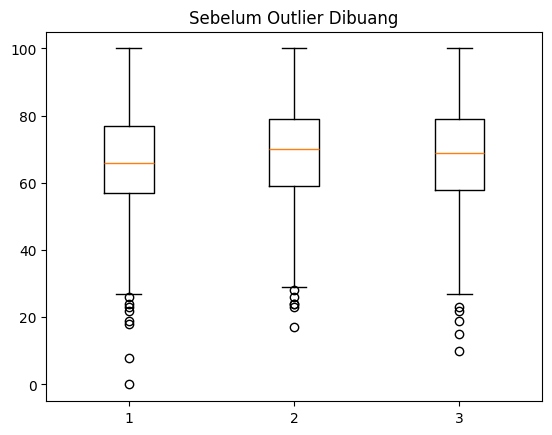

Jumlah Baris Sebelum Outlier dibuang: 1000
****************************************


In [154]:
kolom_numerik = ['math score','reading score','writing score'] 
plt.boxplot(df[kolom_numerik])
plt.title('Sebelum Outlier Dibuang')
plt.show()  

# Data Sebelum dibuang outliernya 
print(f'Jumlah Baris Sebelum Outlier dibuang: {df.shape[0]}') 
print(20*'**')

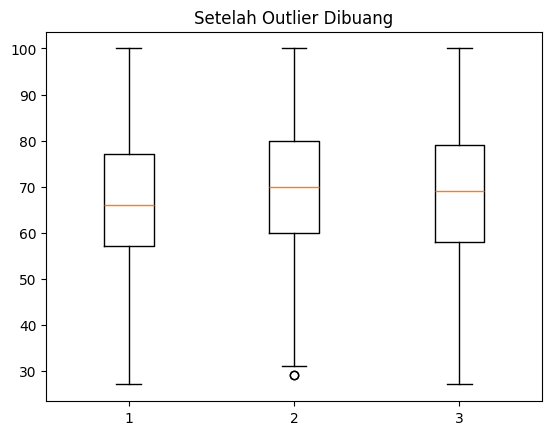

Jumlah Baris setelah outlier dibuang: 988


In [155]:
# Q1, Q3, dan IQR
Q1 = df[kolom_numerik].quantile(0.25)
Q3 = df[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[kolom_numerik] < (Q1 - 1.5 * IQR)) | (df[kolom_numerik] > (Q3 + 1.5 * IQR))).any(axis=1)]

#Cek outlier setelah dibuang
plt.boxplot(df[kolom_numerik])
plt.title('Setelah Outlier Dibuang')
plt.show() 
print(f'Jumlah Baris setelah outlier dibuang: {df.shape[0]}') 

In [156]:
# Menghapus kolom yang tidak diperlukan
df = df.drop(columns=['race/ethnicity', 'lunch'])

# Membuat Kolom baru bernama 'final score' setelah penghapusan kolom
df['final score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Menampilkan data setelah kolom baru ditambahkan
print('Data Setelah ditambah kolom baru:', df.head())

Data Setelah ditambah kolom baru:    gender parental level of education test preparation course  math score  \
0  female           bachelor's degree                    none          72   
1  female                some college               completed          69   
2  female             master's degree                    none          90   
3    male          associate's degree                    none          47   
4    male                some college                    none          76   

   reading score  writing score  final score  
0             72             74    72.666667  
1             90             88    82.333333  
2             95             93    92.666667  
3             57             44    49.333333  
4             78             75    76.333333  


In [123]:
# encoding

In [158]:
import pandas as pd

# Membuat mapping sesuai dengan urutan tingkat pendidikan dari yang rendah ke tinggi
education_map = {
    'some high school': 1,
    'high school': 2,
    'associate\'s degree': 3,
    'some college': 4,
    'bachelor\'s degree': 5,
    'master\'s degree': 6
}

# Melakukan encoding untuk 'parental level of education'
df['parental level of education'] = df['parental level of education'].map(education_map)

# Melakukan encoding untuk 'gender'
df['gender'] = df['gender'].map({'male': 1, 'female': 2})

# Melakukan encoding untuk 'test preparation course'
df['test preparation course'] = df['test preparation course'].map({'none': 1, 'completed': 2})

# Menampilkan data setelah encoding
print(df.head())


   gender  parental level of education  test preparation course  math score  \
0       2                            5                        1          72   
1       2                            4                        2          69   
2       2                            6                        1          90   
3       1                            3                        1          47   
4       1                            4                        1          76   

   reading score  writing score  final score  
0             72             74    72.666667  
1             90             88    82.333333  
2             95             93    92.666667  
3             57             44    49.333333  
4             78             75    76.333333  


In [159]:
# standardisasi data

In [160]:
from sklearn.preprocessing import StandardScaler

# Menyiapkan data untuk clustering (menggunakan kolom numerik yang relevan)
X = df[['math score', 'reading score', 'writing score']]

# Melakukan standardisasi pada data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menampilkan data yang sudah distandarisasi
print(X_scaled[:5])  # Menampilkan 5 baris pertama data yang sudah distandarisasi

# Save data yang sudah bersih
df.to_csv('peforma_cleaned.csv', index=False)

[[ 0.37317432  0.16840602  0.37424098]
 [ 0.16487137  1.45323338  1.33856684]
 [ 1.62299206  1.81012987  1.68296893]
 [-1.36268365 -0.90228345 -1.69217158]
 [ 0.6509116   0.5966818   0.4431214 ]]


In [125]:
# Regression

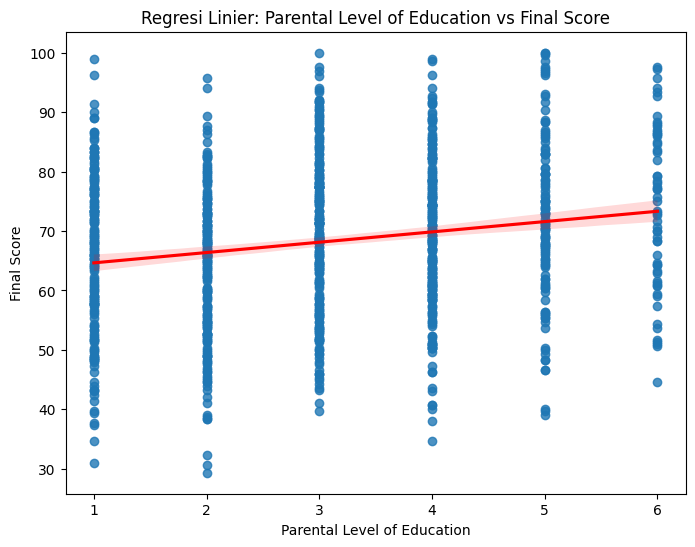

Intercept: 53.038009832267846
Koefisien untuk "parental level of education": 1.7809444390848206
Koefisien untuk "test preparation course": 7.148114061865796


In [161]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data dari file CSV
df = pd.read_csv('peforma_cleaned.csv')

# Menyiapkan data untuk regresi
# Variabel independen (X): parental level of education dan test preparation course
X = df[['parental level of education', 'test preparation course']]

# Variabel dependen (y): final score
y = df['final score']

# Membuat model regresi linier
model = LinearRegression()
model.fit(X, y)

# Menghitung prediksi
y_pred = model.predict(X)

# Visualisasi: Menampilkan hubungan antara 'parental level of education' dan 'final score'
plt.figure(figsize=(8, 6))
sns.regplot(x='parental level of education', y='final score', data=df, line_kws={"color":"red"})
plt.title('Regresi Linier: Parental Level of Education vs Final Score')
plt.xlabel('Parental Level of Education')
plt.ylabel('Final Score')
plt.show()

# Menampilkan koefisien model untuk setiap variabel
print(f'Intercept: {model.intercept_}')
print(f'Koefisien untuk "parental level of education": {model.coef_[0]}')
print(f'Koefisien untuk "test preparation course": {model.coef_[1]}')


In [ ]:
# Clustering

In [163]:
# mencari jumlah cluster yang optimal menggunakan metode Elbow

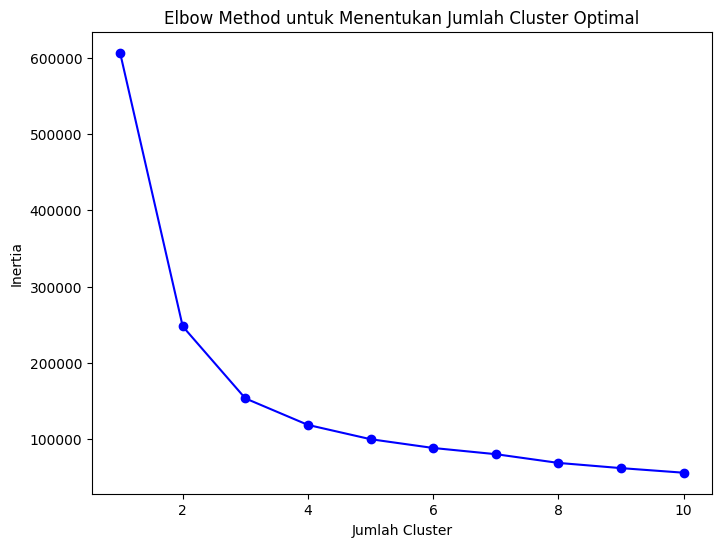

In [162]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menyiapkan data untuk clustering (menggunakan kolom numerik yang relevan)
X = df[['math score', 'reading score', 'writing score']]  # Kolom yang digunakan untuk clustering

# Mencari jumlah cluster optimal menggunakan Elbow Method
Sum_of_squared_distances = []
K = range(1, 11)  # Menguji jumlah cluster dari 1 hingga 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, Sum_of_squared_distances, 'bo-')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()


In [164]:
# Membuat Model Machine Learning (K-means)

In [176]:
#Kolom Features
X = df[["gender","parental level of education","test preparation course","math score","reading score","writing score","final score"]]  

#Training Model
cluster_model = KMeans(n_clusters = 3, random_state = 24)  
labels = cluster_model.fit_predict(X)  

# Membuat Kolom baru bernama 'cluster',
df_final = df 
df_final['cluster'] = labels
print(df_final['cluster'].head())

0    0
1    2
2    2
3    1
4    0
Name: cluster, dtype: int32


In [179]:
# Membuat Kolom Keterangan Cluster

In [183]:
cluster_description = ({0 : 'Cukup', 
                        1 : 'Kurang',
                        2 : 'Baik'})

df_final['cluster description'] = df_final['cluster'].map(cluster_description)
print(df_final[['cluster','cluster description']].head())

   cluster cluster description
0        0               Cukup
1        2                Baik
2        2                Baik
3        1              Kurang
4        0               Cukup


In [184]:
import plotly.express as px
import plotly.io as pio

# Menyiapkan grafik 3D untuk visualisasi
fig = px.scatter_3d(df_final, 
                    x='math score', 
                    y='reading score', 
                    z='writing score', 
                    color='cluster description', 
                    title="3D Scatter Plot of Clusters")

# Menentukan renderer agar grafik muncul dengan benar
pio.renderers.default = "browser"  # Menampilkan plot di browser

# Menampilkan grafik 3D
fig.show()

In [ ]:
# simpan model K-Means
import os
import pickle

# Menentukan direktori tempat menyimpan model
model_dir = '../save-model'

# Memeriksa apakah direktori sudah ada, jika belum, buat direktori
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Menyimpan model K-Means menggunakan pickle
model_path = os.path.join(model_dir, 'cluster.pkl')
pickle.dump(cluster_model, open(model_path, 'wb'))

print(f'Model berhasil disimpan di {model_path}')

Model berhasil disimpan di ../save-model\cluster.pkl
